<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

#### Load the csv file

In [1]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# load the csv file
# store the data in 'df_cancer'
df= pd.read_csv(r"H:\My Drive\MACHINE LEARNING+GL\ML+SLC+GL\SLC+-+03\SLC_Inclass_Day3-3\SLC_Inclass_Day3\bank.csv")

# display first five observations using head()
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.100000,93.994000,-36.400000,4.858000,5191.000000,no
1,32,691,10,999,0,1.400000,93.918000,-42.700000,4.960000,5228.100000,yes
2,45,45,8,999,0,1.400000,93.444000,-36.100000,4.963000,5228.100000,no
3,33,400,1,5,2,-1.100000,94.601000,-49.500000,1.032000,4963.600000,yes
4,47,903,2,999,1,-1.800000,93.075000,-47.100000,1.415000,5099.100000,yes


In [4]:
df.shape

(9640, 11)

<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
import numpy as np

# Function to remove outliers based on the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function on numeric columns
for col in df.select_dtypes(include=np.number).columns:
    df = remove_outliers(df, col)

# Display the cleaned data
df.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.100000,93.994000,-36.400000,4.858000,5191.000000,no
5,25,243,3,999,0,-1.800000,92.843000,-50.000000,1.531000,5099.100000,yes
6,36,214,1,999,0,-0.100000,93.200000,-42.000000,4.120000,5195.800000,no
7,43,550,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
8,52,64,1,999,0,1.100000,93.994000,-36.400000,4.855000,5191.000000,no


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# Replace 'no' with 0 and 'yes' with 1 in the target variable (assuming 'y' is the target column)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Separate dependent (target) and independent variables
X = df.drop(columns=['y'])
y = df['y']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# Replace "unknown" with NaN
df.replace('unknown', np.nan, inplace=True)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# Handling missing values by filling with the mean for numerical columns and mode for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(data[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Check for any remaining null values
df.isnull().sum()


age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

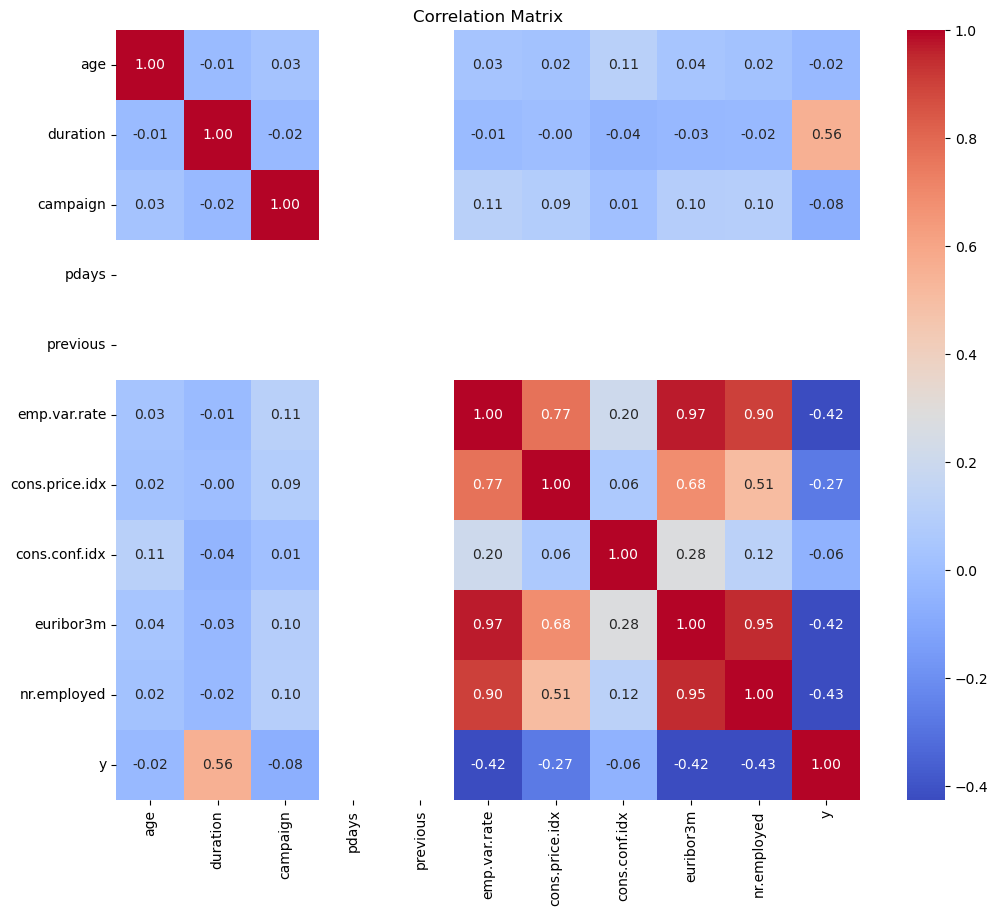

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [10]:
import pandas as pd

# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                     age  duration  campaign  pdays  previous  emp.var.rate  \
age             1.000000 -0.014623  0.030528    NaN       NaN      0.034627   
duration       -0.014623  1.000000 -0.023531    NaN       NaN     -0.013994   
campaign        0.030528 -0.023531  1.000000    NaN       NaN      0.110582   
pdays                NaN       NaN       NaN    NaN       NaN           NaN   
previous             NaN       NaN       NaN    NaN       NaN           NaN   
emp.var.rate    0.034627 -0.013994  0.110582    NaN       NaN      1.000000   
cons.price.idx  0.023518 -0.002134  0.091312    NaN       NaN      0.771564   
cons.conf.idx   0.113354 -0.044339  0.011665    NaN       NaN      0.203312   
euribor3m       0.041138 -0.028417  0.095165    NaN       NaN      0.970027   
nr.employed     0.019635 -0.022059  0.097801    NaN       NaN      0.901754   
y              -0.024568  0.559259 -0.075245    NaN       NaN     -0.423078   

                cons.price.idx 

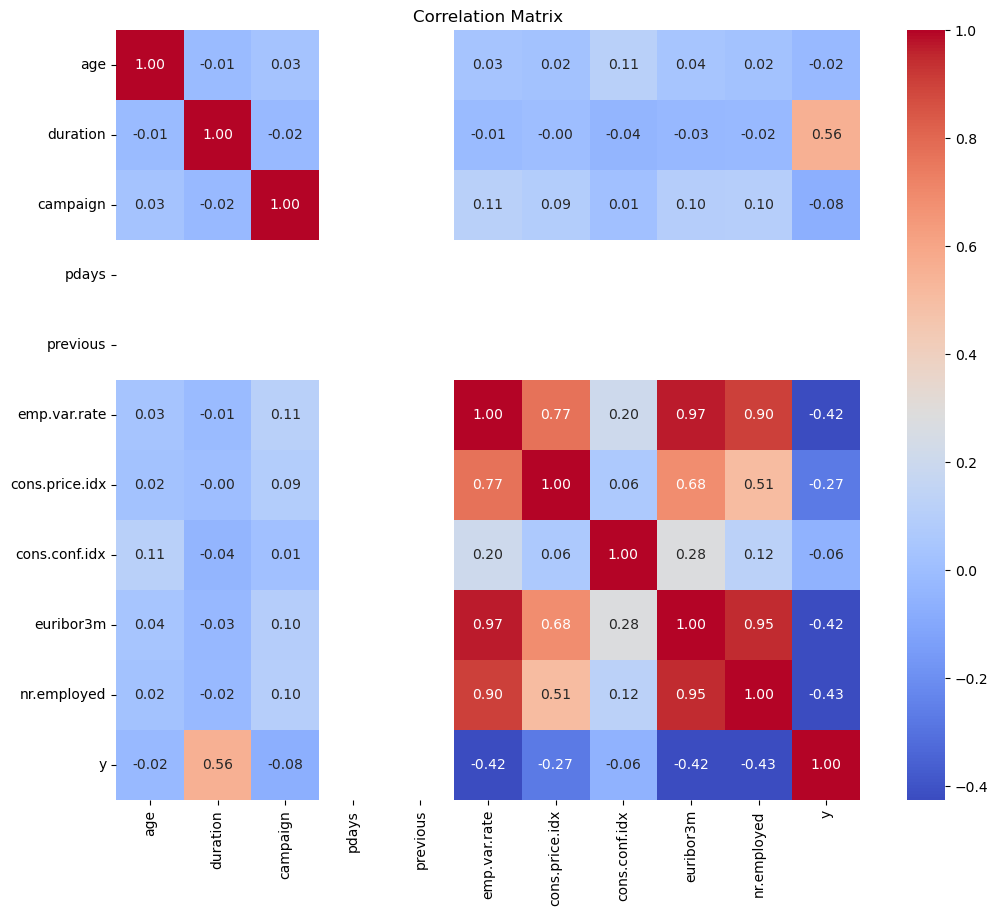

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)


Feature Importances:
duration         0.489179
euribor3m        0.161837
age              0.106717
nr.employed      0.068774
emp.var.rate     0.058431
cons.price.idx   0.040335
cons.conf.idx    0.037925
campaign         0.036802
pdays            0.000000
previous         0.000000
dtype: float64


In [13]:
# Drop the features with zero importance
X = X.drop(columns=['pdays', 'previous'])

# Verify the updated feature set
print("Updated Features:")
print(X.columns)


Updated Features:
Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

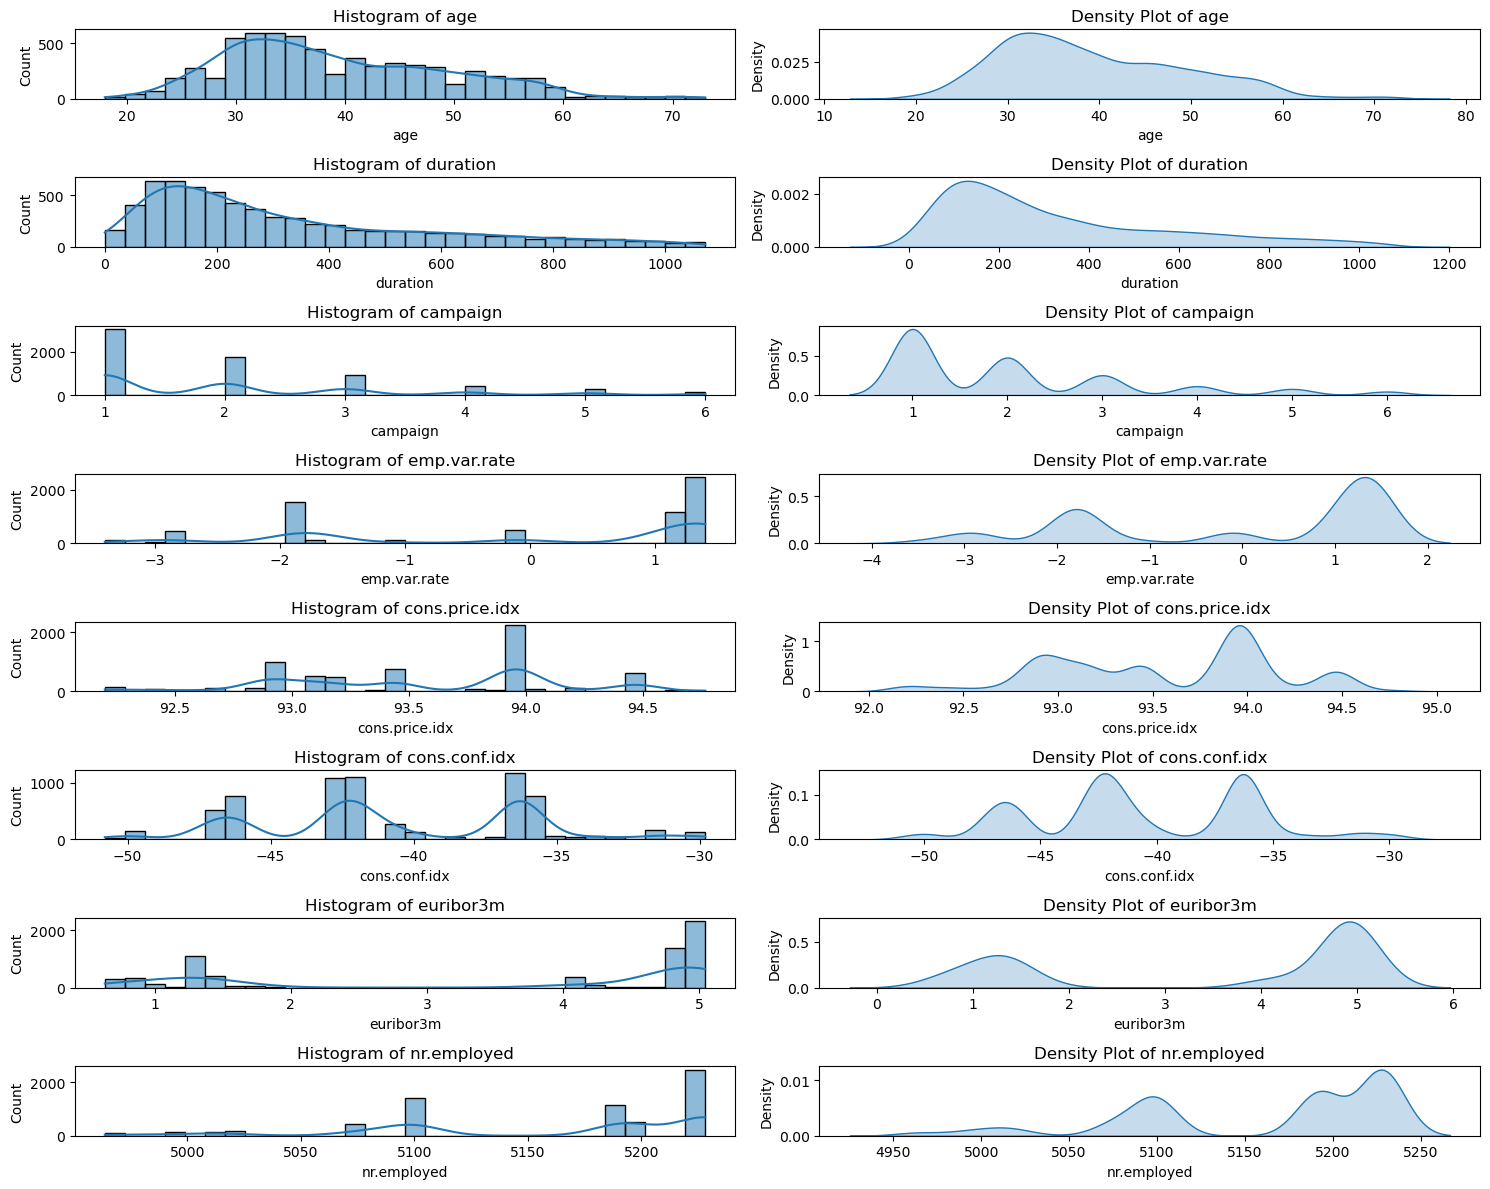

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of each numeric variable
numeric_cols = X.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 2, 2*i + 1)
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(len(numeric_cols), 2, 2*i + 2)
    sns.kdeplot(X[col], shade=True)
    plt.title(f'Density Plot of {col}')

plt.tight_layout()
plt.show()


In [15]:
from scipy.stats import skew

# Calculate skewness for each numeric column
skewness = X[numeric_cols].apply(lambda x: skew(x.dropna()))

# Display skewness values
print("Skewness of numeric variables:")
print(skewness)


Skewness of numeric variables:
age               0.598760
duration          1.042970
campaign          1.323799
emp.var.rate     -0.575849
cons.price.idx   -0.214156
cons.conf.idx     0.104801
euribor3m        -0.545913
nr.employed      -0.880495
dtype: float64


In [16]:
# Apply log transformation to positively skewed variables
X['age'] = np.log1p(X['age'])
X['duration'] = np.log1p(X['duration'])
X['campaign'] = np.log1p(X['campaign'])

# Apply square transformation to negatively skewed variables
X['emp.var.rate'] = X['emp.var.rate'] ** 2
X['cons.price.idx'] = X['cons.price.idx'] ** 2
X['euribor3m'] = X['euribor3m'] ** 2
X['nr.employed'] = X['nr.employed'] ** 2

# Check skewness after transformation
new_skewness = X[numeric_cols].apply(lambda x: skew(x.dropna()))
print("New Skewness of numeric variables:")
print(new_skewness)


New Skewness of numeric variables:
age               0.078695
duration         -0.586739
campaign          0.727154
emp.var.rate      2.178822
cons.price.idx   -0.203512
cons.conf.idx     0.104801
euribor3m        -0.481521
nr.employed      -0.861996
dtype: float64


In [17]:
# Apply further transformations
X['campaign'] = np.sqrt(X['campaign'])
X['duration'] = np.cbrt(X['duration'])

# Recalculate skewness after additional transformations
new_skewness = X[numeric_cols].apply(lambda x: skew(x.dropna()))
print("New Skewness of numeric variables after further transformation:")
print(new_skewness)


New Skewness of numeric variables after further transformation:
age               0.078695
duration         -1.736640
campaign          0.530772
emp.var.rate      2.178822
cons.price.idx   -0.203512
cons.conf.idx     0.104801
euribor3m        -0.481521
nr.employed      -0.861996
dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

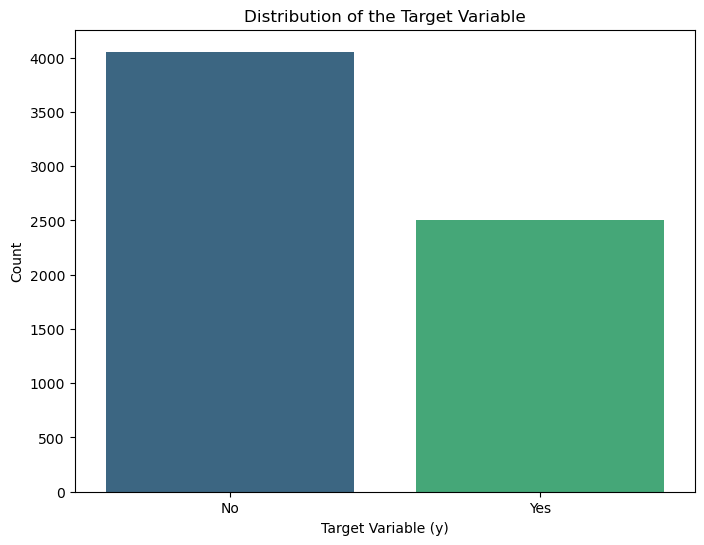

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df, palette='viridis')

# Add titles and labels
plt.title('Distribution of the Target Variable')
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X is the DataFrame with all features

# Identify numeric columns
numeric_cols = X.select_dtypes(include=np.number).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric features
X_scaled = scaler.fit_transform(X[numeric_cols])

# Create a DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols, index=X.index)

# Optionally, combine scaled features with other features
X_final = pd.concat([X_scaled_df, X.drop(columns=numeric_cols)], axis=1)

# Display the first few rows of the scaled data
print(X_final.head())


        age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0 -0.684170 -0.083201  0.264646     -0.627229        0.748606       0.910789   
5 -1.642527  0.094912  0.993307      0.258190       -1.217239      -2.008186   
6 -0.224267 -0.037859 -0.950657     -1.150629       -0.610093      -0.291142   
7  0.472245  0.904313 -0.950657     -0.627229        0.748606       0.910789   
8  1.220334 -1.410536 -0.950657     -0.627229        0.748606       0.910789   

   euribor3m  nr.employed  
0   0.764067     0.390330  
5  -1.213338    -0.848375  
6   0.147690     0.455636  
7   0.763163     0.390330  
8   0.761356     0.390330  


<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

In [20]:
# Check mean and standard deviation of the scaled features
means = X_final[numeric_cols].mean()
stds = X_final[numeric_cols].std()

print("Means of scaled features:")
print(means)
print("\nStandard deviations of scaled features:")
print(stds)


Means of scaled features:
age              -0.000000
duration         -0.000000
campaign          0.000000
emp.var.rate     -0.000000
cons.price.idx    0.000000
cons.conf.idx    -0.000000
euribor3m         0.000000
nr.employed      -0.000000
dtype: float64

Standard deviations of scaled features:
age              1.000076
duration         1.000076
campaign         1.000076
emp.var.rate     1.000076
cons.price.idx   1.000076
cons.conf.idx    1.000076
euribor3m        1.000076
nr.employed      1.000076
dtype: float64


In [21]:
# Display the first few rows of the final dataset
print(X_final.head())


        age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0 -0.684170 -0.083201  0.264646     -0.627229        0.748606       0.910789   
5 -1.642527  0.094912  0.993307      0.258190       -1.217239      -2.008186   
6 -0.224267 -0.037859 -0.950657     -1.150629       -0.610093      -0.291142   
7  0.472245  0.904313 -0.950657     -0.627229        0.748606       0.910789   
8  1.220334 -1.410536 -0.950657     -0.627229        0.748606       0.910789   

   euribor3m  nr.employed  
0   0.764067     0.390330  
5  -1.213338    -0.848375  
6   0.147690     0.455636  
7   0.763163     0.390330  
8   0.761356     0.390330  


## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [22]:
# type your code here
# Assuming 'y' is the target variable and X_final includes the scaled features
X_final_with_target = X_final.copy()
X_final_with_target['y'] = y

print(X_final_with_target.head())


        age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0 -0.684170 -0.083201  0.264646     -0.627229        0.748606       0.910789   
5 -1.642527  0.094912  0.993307      0.258190       -1.217239      -2.008186   
6 -0.224267 -0.037859 -0.950657     -1.150629       -0.610093      -0.291142   
7  0.472245  0.904313 -0.950657     -0.627229        0.748606       0.910789   
8  1.220334 -1.410536 -0.950657     -0.627229        0.748606       0.910789   

   euribor3m  nr.employed  y  
0   0.764067     0.390330  0  
5  -1.213338    -0.848375  1  
6   0.147690     0.455636  0  
7   0.763163     0.390330  0  
8   0.761356     0.390330  0  


In [23]:
from sklearn.model_selection import train_test_split

# Separate target variable from features
y = df['y']
X_final = X_final  # Features after scaling

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1207
           1       0.80      0.82      0.81       761

    accuracy                           0.85      1968
   macro avg       0.84      0.84      0.84      1968
weighted avg       0.85      0.85      0.85      1968

Confusion Matrix:
[[1054  153]
 [ 140  621]]
Accuracy Score: 0.85


In [25]:
# Example with a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Get feature importances
importances = tree_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)


Feature Importances:
duration         0.442777
euribor3m        0.332489
age              0.086255
nr.employed      0.048531
campaign         0.047629
cons.price.idx   0.019434
cons.conf.idx    0.013935
emp.var.rate     0.008951
dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix heatmap.
    
    Parameters:
    - y_true: Array-like, true target values.
    - y_pred: Array-like, predicted target values.
    - labels: List of labels to index the matrix.
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


#### Define a function to plot the confusion matrix.

#### Define a function to plot the ROC curve.

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_scores):
    """
    Plots the ROC curve and displays the AUC score.
    
    Parameters:
    - y_true: Array-like, true binary labels.
    - y_scores: Array-like, target scores (probabilities).
    """
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.impute import SimpleImputer

# Load the csv file
#df = pd.read_csv('bank_client_data.csv') # replace with your actual file path
#df.head()


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize kNN with 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of kNN model: {accuracy_knn:.2f}")


Accuracy of kNN model: 0.87


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1207
           1       0.81      0.85      0.83       761

    accuracy                           0.87      1968
   macro avg       0.86      0.86      0.86      1968
weighted avg       0.87      0.87      0.87      1968



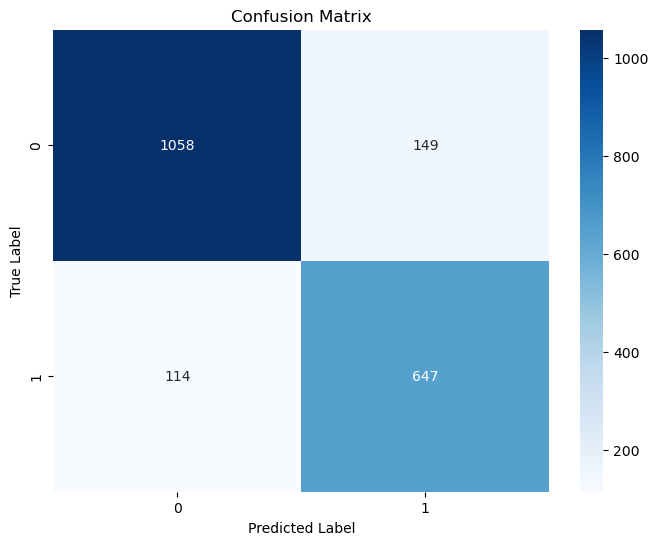

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Make predictions using the kNN model
y_pred_knn = knn_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_knn, labels=[0, 1])


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 25, 2),
    'metric': ['hamming', 'euclidean', 'manhattan', 'chebyshev']
}

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           scoring=make_scorer(accuracy_score), cv=3)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# Optionally: retrain the kNN model with the best parameters on the full training data
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 9}
Best cross-validation score: 0.8619


KNeighborsClassifier(metric='manhattan', n_neighbors=9)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the kNN classifier with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=9, metric='manhattan')

# Fit the model on the full training data
best_knn.fit(X_train, y_train)

# Predict on the test data
y_pred_best_knn = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_best_knn)
print(f"Accuracy of the kNN model with best parameters: {accuracy:.4f}")

# Generate and print the classification report
print("Classification Report for the Best kNN Model:")
print(classification_report(y_test, y_pred_best_knn))


Accuracy of the kNN model with best parameters: 0.8689
Classification Report for the Best kNN Model:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1207
           1       0.81      0.86      0.84       761

    accuracy                           0.87      1968
   macro avg       0.86      0.87      0.86      1968
weighted avg       0.87      0.87      0.87      1968



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Area Under the ROC Curve (AUC-ROC): 0.9301


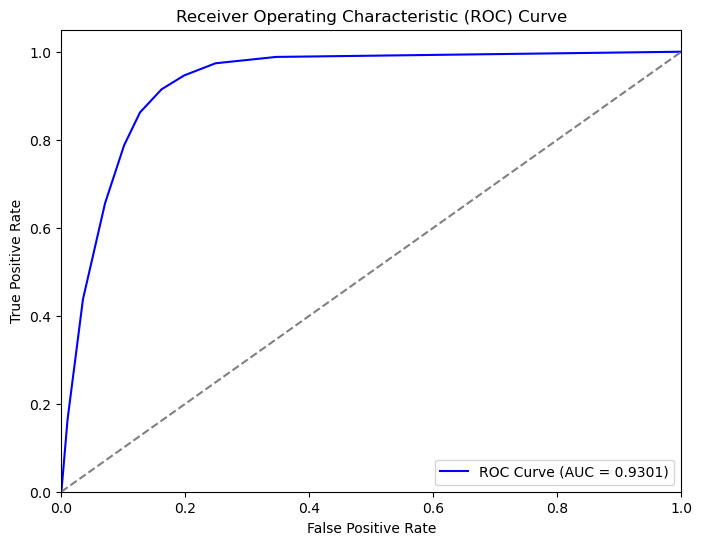

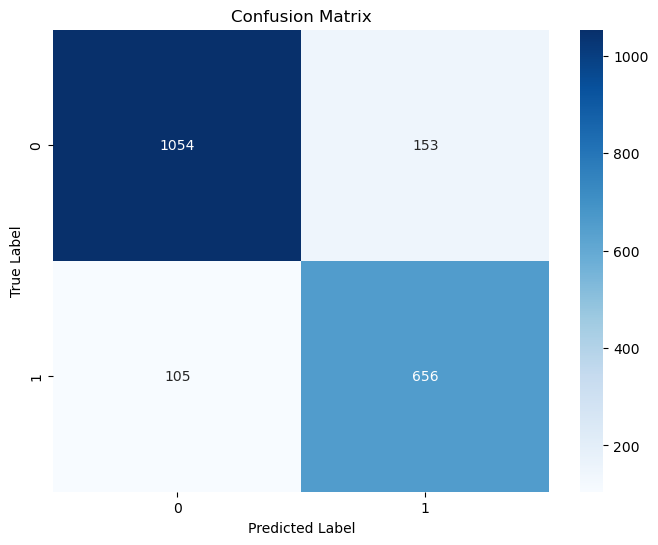

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities for the positive class
y_prob = best_knn.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Area Under the ROC Curve (AUC-ROC): {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Generate and print the confusion matrix
y_pred_best_knn = best_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


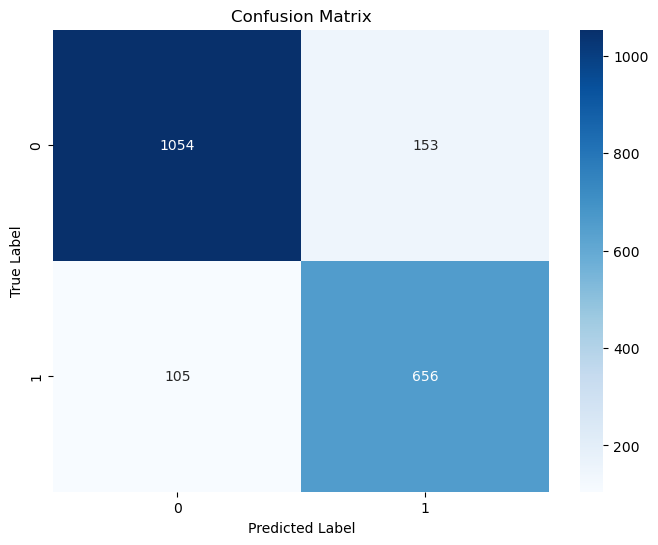

In [34]:
# Generate and print the confusion matrix
y_pred_best_knn = best_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [35]:
# Generate and print the confusion matrix
y_pred_best_knn = best_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best_knn)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the summary
print("Confusion Matrix Summary:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Confusion Matrix Summary:
True Negatives (TN): 1054
False Positives (FP): 153
False Negatives (FN): 105
True Positives (TP): 656
Accuracy: 0.8689
Precision: 0.8109
Recall: 0.8620
F1 Score: 0.8357


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# Calculate the number of correctly and incorrectly classified observations
correct_predictions = (y_test == y_pred_best_knn).sum()
incorrect_predictions = (y_test != y_pred_best_knn).sum()

# Calculate the total number of observations
total_observations = len(y_test)

# Compute the percentages
percentage_correct = (correct_predictions / total_observations) * 100
percentage_incorrect = (incorrect_predictions / total_observations) * 100

# Print the results
print(f"Percentage of Correctly Classified Observations: {percentage_correct:.2f}%")
print(f"Percentage of Misclassified Observations: {percentage_incorrect:.2f}%")


Percentage of Correctly Classified Observations: 86.89%
Percentage of Misclassified Observations: 13.11%


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Define the range of k (odd numbers between 1 and 25)
k_values = np.arange(1, 26, 2)

# Initialize a list to store accuracy for each k
accuracy = []

# Loop over each value of k
for k in k_values:
    # Initialize the kNN model with Euclidean distance and current k
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # Train the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Append the accuracy to the list
    accuracy.append(acc)

# Print the accuracy for each value of k
for k, acc in zip(k_values, accuracy):
    print(f"k={k}, Accuracy={acc:.4f}")


k=1, Accuracy=0.8379
k=3, Accuracy=0.8664
k=5, Accuracy=0.8796
k=7, Accuracy=0.8709
k=9, Accuracy=0.8714
k=11, Accuracy=0.8704
k=13, Accuracy=0.8714
k=15, Accuracy=0.8699
k=17, Accuracy=0.8643
k=19, Accuracy=0.8679
k=21, Accuracy=0.8659
k=23, Accuracy=0.8669
k=25, Accuracy=0.8659


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

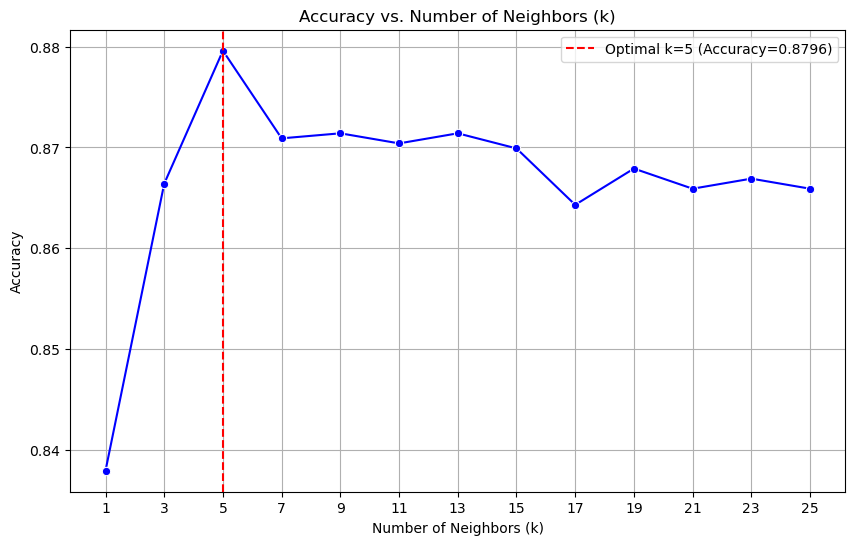

Optimal k: 5
Accuracy at optimal k: 0.8796


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of k values (odd numbers between 1 and 25)
n_neighbors = np.arange(1, 26, 2)

# Accuracy values for each k from your results
accuracy = [0.8379, 0.8664, 0.8796, 0.8709, 0.8714, 0.8704, 0.8714, 0.8699, 0.8643, 0.8679, 0.8659, 0.8669, 0.8659]

# Find the optimal k (the one with the highest accuracy)
optimal_k = n_neighbors[np.argmax(accuracy)]
optimal_accuracy = max(accuracy)

# Plot the accuracy for each value of k
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_neighbors, y=accuracy, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xticks(n_neighbors)  # Ensure all k values are shown on the x-axis
plt.grid(True)

# Highlight the optimal k value on the plot
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k} (Accuracy={optimal_accuracy:.4f})')
plt.legend()

plt.show()

# Print the optimal k and its accuracy
print(f"Optimal k: {optimal_k}")
print(f"Accuracy at optimal k: {optimal_accuracy:.4f}")


Given list of values:

    n_neighbors = np.arange(1, 25, 2)

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = gnb.predict(X_test)

# Generate the classification report
classification_rep_gnb = classification_report(y_test, y_pred_gnb)
print("Classification Report for Gaussian Naive Bayes Model:\n", classification_rep_gnb)

# Calculate the accuracy score
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy Score for Gaussian Naive Bayes Model: {accuracy_gnb:.4f}")

# Generate and print the confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix for Gaussian Naive Bayes Model:\n", cm_gnb)


Classification Report for Gaussian Naive Bayes Model:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81      1207
           1       0.71      0.61      0.65       761

    accuracy                           0.75      1968
   macro avg       0.74      0.72      0.73      1968
weighted avg       0.75      0.75      0.75      1968

Accuracy Score for Gaussian Naive Bayes Model: 0.7505
Confusion Matrix for Gaussian Naive Bayes Model:
 [[1015  192]
 [ 299  462]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Area Under the ROC Curve (AUC-ROC): 0.8779
Confusion Matrix for Gaussian Naive Bayes Model:
 [[1015  192]
 [ 299  462]]


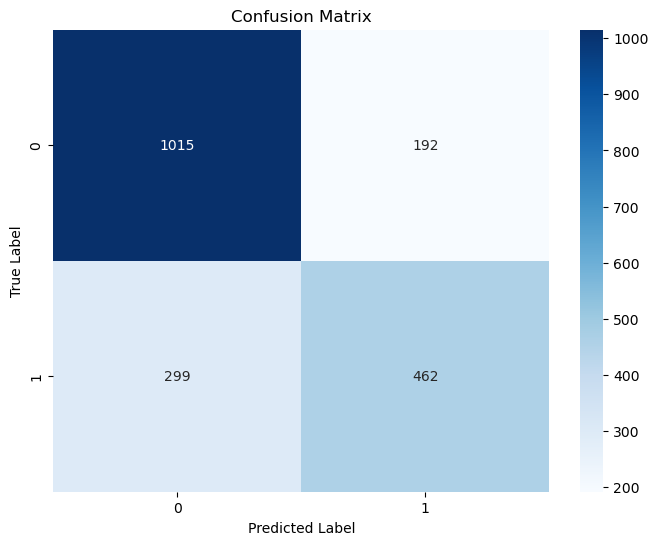

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Get probability estimates for the positive class (1)
y_proba_gnb = gnb.predict_proba(X_test)[:, 1]

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_proba_gnb)
print(f"Area Under the ROC Curve (AUC-ROC): {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_gnb)

# Generate confusion matrix
y_pred_gnb = gnb.predict(X_test)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix for Gaussian Naive Bayes Model:\n", cm_gnb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = np.mean(cv_scores)
print(f"Average Accuracy from 10-Fold Cross-Validation: {average_accuracy:.4f}")


Average Accuracy from 10-Fold Cross-Validation: 0.7254
